Tyler Fischer

I created this file while following along with Andrew Ng's CS 229 lectures and notes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate Data

In [2]:
x = np.linspace(0,1,101)
x = x.reshape((len(x),1))

noise = np.random.randn(len(x),1) * 0.5

In [3]:
m = 4
b = 2.5

# this is the 'true' underlying trend
# that we wouldn't actually know in
# practice
true_trend = m*x + b

# this is the noisy data that would be
# collected in practice
data = true_trend + noise

# Write Gradient Descent Fuctions

#### The following formula was used for batch gradient descent:

$repeat \ \{ \\ \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\}$

In [4]:
def batch_desc(x_data, y_data, theta, learning_rate = 0.01, iterations = 100):
    
    m = len(x_data)
    for i in range(iterations):
        prediction = x_data @ theta
        error = prediction - y_data
        
        theta -= learning_rate/m * (x_data.T @ error)
    
    return theta

#### The following formula was used for stochastic gradient descent:

$repeat \ \{ \\ \enspace for \ i = 1 \ to \ m \ \{ \\ \enspace \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\ (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\enspace\} \\\}$

In [5]:
def stoch_desc(x_data, y_data, theta, learning_rate = 0.01, iterations = 100):
    
    m = len(x_data)
    x_shape = x_data[0].shape[0]
    theta_shape = theta[0].shape[0]
    data_shape = data[0].shape[0]
    
    for j in range(iterations):
        for i in range(m):
            prediction = x_data[i].reshape(1,x_shape) @ theta
            error = prediction - y_data[i].reshape(data_shape,1)

            theta -= learning_rate/m * (x_data[i].reshape(x_shape,1) @ error)
    
    return theta

# Format data for input into each algorithm

In [6]:
ones = np.ones((len(x),1))
x_b = np.append(x,ones,axis=1)
theta_init = np.array([[0.0],[0.0]])

i = 1000
alpha = 0.01
theta_batch = batch_desc(x_b, data, theta_init, learning_rate = alpha, iterations = i)
theta_stoch = stoch_desc(x_b, data, theta_init, learning_rate = alpha, iterations = i)

# this is the solution using the normal equation
# for comparison
theta_norm = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ data

# Use results to generate estimated trend lines

In [7]:
approx_batch = x_b @ theta_batch
approx_stoch = x_b @ theta_stoch
approx_norm = x_b @ theta_norm

# calculate the error of each approximation
E1 = data - approx_batch
E2 = data - approx_stoch
E3 = data - approx_norm
E = np.array([np.linalg.norm(E1),np.linalg.norm(E2),np.linalg.norm(E3)])
E

array([5.66577348, 5.66577348, 5.3969513 ])

# Plot the Results

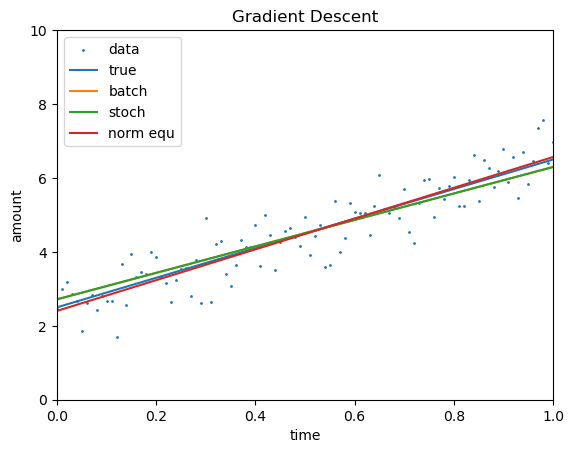

In [8]:
plt.figure()
plt.axis((0,1,0,10))
plt.scatter(x,data, s = 1)
plt.plot(x,true_trend)
plt.plot(x,approx_batch)
plt.plot(x,approx_stoch)
plt.plot(x,approx_norm)
plt.legend(['data', 'true', 'batch', 'stoch', 'norm equ'])
plt.title('Gradient Descent')
plt.xlabel('time')
plt.ylabel('amount')
plt.show()